# Machine Learning - Assignment 1

## Naive Bayes Learning algorithm, Cross-validation, and ROC-Curves

The aim of the assignment is to implement:

* Naive Bayes learning algorithm for binary classification tasks
* Visualization to plot a ROC-curve
* A cross-validation test
* Visualization of the average ROC-curve of a cross-validation test

Follow the instructions and implement what is missing to complete the assignment. Some functions have been started to help you a little bit with the inputs or outputs of the function.

**Note:** You might need to go back and forth during your implementation of the code. The structure is set up to make implementation easier, but how you return values from the different functions might vary, and you might find yourself going back and change something to make it easier later on.

## Assignment preparations

We help you out with importing the libraries and reading the data.

Look at the output to get an idea of how the data is structured.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import e, pi, sqrt

data = pd.read_csv("iris.csv").to_numpy()

mapped, index, unique_arr = np.unique(data[:, -1], return_index=True, return_inverse=True)
data[:, -1] = unique_arr
iris_setosa, iris_versicolor, iris_virginica = np.split(data, index[1:])

print(f"Full data array (features and labels):\n{iris_setosa[:3]}\n")
print("###############\n")
print(f"Train features (first 4 columns):\n{iris_setosa[:3, :-1]}\n")
print(f"Labels (last column):\n{iris_setosa[:3, -1:]}\n")
print(f"Names of labels:\n{[[numb, name] for numb, name in enumerate(mapped)]}")

Full data array (features and labels):
[[5.1 3.5 1.4 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [4.7 3.2 1.3 0.2 0]]

###############

Train features (first 4 columns):
[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Labels (last column):
[[0]
 [0]
 [0]]

Names of labels:
[[0, 'Iris-setosa'], [1, 'Iris-versicolor'], [2, 'Iris-virginica']]


In [2]:
# Example print of the 3 first datapoints (similar as above):
iris_setosa[:3]

array([[5.1, 3.5, 1.4, 0.2, 0],
       [4.9, 3.0, 1.4, 0.2, 0],
       [4.7, 3.2, 1.3, 0.2, 0]], dtype=object)

## Data handling functions

As a start, we are going to implement some basic data handling functions to use in the future.

### 1) Split class into a train and test set

First, we need to be able to split the class into a train and test set.

In [3]:
def train_test_split(class_data):
    
    # TODO: Split the data into two parts, train and test.
    # Numpy has some functionality that makes implementing this part easier.

    # NOTE: Use seed if we want the same datasets all the time
    rng = np.random.default_rng()
    
    # Shuffle data first
    shuffled_data = rng.permutation(class_data)

    # Calculate the splits: 25% test 75% train
    test_size = 0.25
    test_data_size = int(len(shuffled_data) * test_size)

    # Split the data
    train = shuffled_data[test_data_size:]
    test = shuffled_data[:test_data_size]
    
    return train, test

In [4]:
# TODO: Test the train_test_split function
train, test = train_test_split(iris_setosa)

size_test = len(test)
size_train = len(train)
size_class = len(iris_setosa)
# TODO: Print the output
print(f"TEST SPLIT:\n{test}\n\nTRAIN SPLIT:\n{train}")
print(f"\nSIZE OF TEST SPLIT: {size_test}")
print(f"\nSIZE OF TRAIN SPLIT: {size_train}")
print(f"\nSIZE OF CLASS: {size_class}")
print(f"TEST SIZE (%): {size_test / size_class * 100} %")
print(f"TRAIN SIZE (%): {size_train / size_class * 100} %")

TEST SPLIT:
[[4.3 3.0 1.1 0.1 0]
 [4.8 3.0 1.4 0.3 0]
 [5.4 3.4 1.7 0.2 0]
 [4.8 3.0 1.4 0.1 0]
 [5.1 3.4 1.5 0.2 0]
 [4.9 3.1 1.5 0.1 0]
 [4.6 3.6 1.0 0.2 0]
 [5.4 3.9 1.7 0.4 0]
 [5.0 3.6 1.4 0.2 0]
 [5.1 3.8 1.5 0.3 0]
 [4.8 3.4 1.6 0.2 0]
 [5.2 4.1 1.5 0.1 0]]

TRAIN SPLIT:
[[5.4 3.4 1.5 0.4 0]
 [5.2 3.4 1.4 0.2 0]
 [5.4 3.9 1.3 0.4 0]
 [5.5 3.5 1.3 0.2 0]
 [4.9 3.1 1.5 0.1 0]
 [4.8 3.4 1.9 0.2 0]
 [5.4 3.7 1.5 0.2 0]
 [5.5 4.2 1.4 0.2 0]
 [5.3 3.7 1.5 0.2 0]
 [4.9 3.1 1.5 0.1 0]
 [5.1 3.7 1.5 0.4 0]
 [4.8 3.1 1.6 0.2 0]
 [5.7 3.8 1.7 0.3 0]
 [5.1 3.8 1.6 0.2 0]
 [5.0 3.4 1.6 0.4 0]
 [5.0 3.3 1.4 0.2 0]
 [5.1 3.8 1.9 0.4 0]
 [4.7 3.2 1.3 0.2 0]
 [5.0 3.4 1.5 0.2 0]
 [5.0 3.2 1.2 0.2 0]
 [4.6 3.2 1.4 0.2 0]
 [4.6 3.4 1.4 0.3 0]
 [4.5 2.3 1.3 0.3 0]
 [4.4 3.0 1.3 0.2 0]
 [4.6 3.1 1.5 0.2 0]
 [4.7 3.2 1.6 0.2 0]
 [5.1 3.5 1.4 0.2 0]
 [5.2 3.5 1.5 0.2 0]
 [4.9 3.0 1.4 0.2 0]
 [5.0 3.5 1.3 0.3 0]
 [4.4 2.9 1.4 0.2 0]
 [5.8 4.0 1.2 0.2 0]
 [5.0 3.5 1.6 0.6 0]
 [5.1 3.5 1.4 0.3 0]
 [5.0 3

### 2) Split data into features and labels

The data as shown above is not always the optimal shape. To help us keep track of things, we can split the data into its features and labels seperately.

Each class is 4 features and 1 label in the same array: 

* **[feature 1, feature 2, feature 3, feature 4, label]**

It would help us later to have the features and labels in seperate arrays in the form: 

* **[feature 1, feature 2, feature 3, feature 4]** and **[label]**

Here you are going to implement this functionallity.

In [5]:
def class_split(class_data):

	# TODO: Split one class into its features and labels
	features, labels = class_data[:, :4].astype(np.float64), class_data[:, -1:]

	return features, labels

We should first test the "**class_split**" function on one of the classes above (iris_setosa, etc...) to make sure it works properly.

In [6]:
# TODO: Test the class splitting function
features, labels = class_split(iris_setosa)

# TODO: Print the output
print(f"FEATURES:\n{features}\n\nLABELS:\n{labels}")


FEATURES:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]]

LABELS:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]


We should also try to **1)** first split a class into a train and test set, **2)** split each of these two into features and labels. In total there should be 4 arrays (2 feature and 2 label arrays).

In [7]:
# TODO: Use the above data handling functions to make 2 feature arrays and 2 label arrays. 
train, test = train_test_split(iris_setosa)
train_features, train_labels = class_split(train)
test_features, test_labels = class_split(test)

# TODO: Print the output (you may use multiple print-statements if you wish)
print(f"TRAIN FEATURES:\n{train_features}\n\nTRAIN LABELS:\n{train_labels}")
print(f"\nTEST FEATURES:\n{test_features}\n\nTEST LABELS:\n{test_labels}")

TRAIN FEATURES:
[[4.3 3.  1.1 0.1]
 [4.8 3.4 1.6 0.2]
 [4.4 3.  1.3 0.2]
 [4.6 3.4 1.4 0.3]
 [5.2 3.4 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [4.9 3.1 1.5 0.1]
 [4.6 3.1 1.5 0.2]
 [5.  3.  1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.5 1.6 0.6]
 [5.4 3.9 1.7 0.4]
 [5.1 3.7 1.5 0.4]
 [5.  3.5 1.3 0.3]
 [5.1 3.4 1.5 0.2]
 [5.7 4.4 1.5 0.4]
 [5.3 3.7 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.4 3.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.3 0.4]
 [4.7 3.2 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.6 0.2]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.1]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [5.1 3.5 1.4 0.2]
 [4.8 3.4 1.9 0.2]
 [4.7 3.2 1.6 0.2]
 [5.8 4.  1.2 0.2]
 [5.  3.2 1.2 0.2]
 [5.7 3.8 1.7 0.3]]

TRAIN LABELS:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

TEST FEATURES:
[[4.9 3.1 1.5 0.1]
 [5.1 3.5 1.4 0.3]
 

Think a bit before going to the next task, what can easily go wrong in the above code?

## Naive Bayes learning algorithm

When implementing the Navie Bayes learning algorithm, we can break it down into a few components.

We will implement these components one at a time.

### 3) Calculate feature statistics

First, we need to implement a function that returns feature statistics (means, standard deviation, priors) for a given set of feature data for a single class. This is the equivalent of "training" the naive bayes model.

**Note 1:** Each feature gets its own mean and standard deviation!

**Note 2:** The way you structure the functions (what is returned) shapes the remainder of the assignment.

In [8]:
def calculate_feature_statistics(feature_data, size):
	# TODO: Complete this function so that it returns the feature statistics for the input data.
	means = np.mean(feature_data, axis=0)
	stdevs = np.std(feature_data, axis=0)

	prior = feature_data.shape[0] / size
	
	return {
		'means': means, 
		'stdevs': stdevs, 
		'prior': prior
	} # You choose how you return the statistics

To make sure the function works, we should test it before proceding.

In [9]:
# TODO: Make sure to use our previous class splitting function.
feature_data, _ = class_split(iris_setosa)

# TODO: Test the function here for one of the dataset classes. 

feature_statistics = calculate_feature_statistics(feature_data, len(iris_setosa))

# TODO: Print the output from the feature statistic function.
print("Means:", feature_statistics['means'])
print("Standard Deviations:", feature_statistics['stdevs'])
print("Prior:", feature_statistics['prior']) 

Means: [5.006 3.418 1.464 0.244]
Standard Deviations: [0.34894699 0.37719491 0.17176728 0.10613199]
Prior: 1.0


### 4) Gaussian probability density function (Gaussian PDF)

Now we need to implement the gaussian probability density function to use for a single datapoint.

**Note:** Look at the imports in the first cell at the top, it has some math numbers for easy use here. 

In [10]:
def gaussian_probability_density_function(x, means, stdevs):
	
	numerator = e**(-0.5 * ((x - means) / stdevs)**2)
	denominator = sqrt(2 * pi) * stdevs
	return numerator / denominator # TODO: Implement the gaussian probability density function.


### 5) Testing Gaussian PDF

We should test it to make sure it works. Train it, using the "calculate_feature_statistics" function, on one of the dataset classes. Then, take one datapoint from the same class and use naive bayes gaussian to make a prediction.

In [11]:
# TODO: Implement the code below to test the "gaussian_probability_density_function" function for one of the classes.
feature_data, _ = class_split(iris_setosa)

feature_statistics = calculate_feature_statistics(feature_data, len(iris_setosa))

# TODO: Test with one datapoint from the learned class.
data_point = feature_data[0]
prob_density = gaussian_probability_density_function(data_point, feature_statistics['means'], feature_statistics['stdevs'])

# TODO: Print the probability density
print(prob_density)

[1.1025365  1.03295597 2.16682262 3.44938415]


As a test, take one datapoint from one of the other classes and see if the predicted probability changes.

In [12]:
# TODO: Take one datapoint from one of the other classes.
feature_data, _ = class_split(iris_versicolor)

feature_statistics = calculate_feature_statistics(feature_data, len(iris_versicolor))

other_class_datapoint = feature_data[0]

# TODO: Use naive bayes gaussian on this datapoint with the same feature statistics as the first class.
prob_density = gaussian_probability_density_function(other_class_datapoint, feature_statistics['means'], feature_statistics['stdevs'])

# TODO: Print the probability density
print(prob_density)

[0.08932957 0.49269573 0.54829328 1.89734864]


Think a bit why the probability changes, what could affect the prediction?

## Prepare Naive Bayes for binary classification

### 6) Prepare the data for inference

Before we train and test the naive bayes for multiple classes, we should get our data in order.

Similar to how we did previously, we should now split two classes into a train and test set, you may choose which two classes freely.

In [13]:
# TODO: Split two classes into train and test sets.
train_versicolor, test_versicolor = train_test_split(iris_versicolor)
train_setosa, test_setosa = train_test_split(iris_setosa)

# TODO: Separate the features and labels for both the train and test set.
feature_data_setosa_train, labels_setosa_train = class_split(train_setosa)
feature_data_setosa_test, labels_setosa_test = class_split(test_setosa)
feature_data_versicolor_train, labels_versicolor_train = class_split(train_versicolor)
feature_data_versicolor_test, labels_versicolor_test = class_split(test_versicolor)

### 7) Class A vs Class B for binary classification

**Note:** You might need to go back and forth a bit in the following cells during your implementation of your code.

We have to get the probability from two sets of classes and compare the two probabilities in order to make a proper prediction.

Here we will implement two functions to make this possible. We separate these functions to make the implementation of the ROC-curve easier later on.

**Function 1: naive_bayes_prediction** 
* A function that returns the probabilities for each class the model for a single datapoint.

**Function 2: probabilities_to_prediction**
* A function that takes in probabilities and returns a prediction.

In [14]:
def stable_softmax(log_probs):
	log_probs_values = np.array(list(log_probs.values()))
	shifted_logits = log_probs_values - np.max(log_probs_values)
	exp_probs = np.exp(shifted_logits)
	probabilities = exp_probs / np.sum(exp_probs)
	return dict(zip(log_probs.keys(), probabilities))

def naive_bayes_prediction(feature_stats, data_point):
	prediction_probabilities = {}
	for class_label, feature_statistics in feature_stats.items():
		# if class_label == '0':
		# 	norm_data_point = (data_point - feature_statistics['means']) / feature_statistics['stdevs']
		# print(norm_data_point)
		# print(data_point)
		# print(f"Class Label: {class_label}")
		# print(f"Means: {feature_statistics['means']}")
		# print(f"Standard Deviations: {feature_statistics['stdevs']}")
		# print(f"Prior: {feature_statistics['prior']}")
		prob_density = gaussian_probability_density_function(norm_data_point, feature_statistics['means'], feature_statistics['stdevs'])
		probability = np.sum(np.log(prob_density + 1e-9))
		# probability = np.prod(prob_density)
		# probability = probability * np.log(feature_statistics['prior'])
		probability = probability + np.log(feature_statistics['prior'])
		prediction_probabilities[class_label] = probability
	
	prediction_probabilities = stable_softmax(prediction_probabilities)
	# prediction_probabilities['0'] = (prediction_probabilities['0'] / (prediction_probabilities['0'] + prediction_probabilities['1']))
	# prediction_probabilities['1'] = (prediction_probabilities['1'] / (prediction_probabilities['0'] + prediction_probabilities['1']))
	return prediction_probabilities

In [15]:
def probabilities_to_prediction(probabilities):

	# TODO: Implement prediction of the class with the highest probability
	class_prediction = max(probabilities, key=probabilities.get)
	return class_prediction

To test the function we need the feature metrics from the classes we choose. 

**Note:** Choose the correct train/test set and the correct feature/label split!

In [16]:
# TODO: Get the feature metrics for the classes
feature_statistics_setosa = calculate_feature_statistics(feature_data_setosa_train, (len(feature_data_versicolor_train) + len(feature_data_setosa_train)))
feature_statistics_versicolor = calculate_feature_statistics(feature_data_versicolor_train, (len(feature_data_versicolor_train) + len(feature_data_setosa_train)))

Now we should have implemented all the neccessary parts to train a naive bayes algorithm and do inference on it. Implement a small test workflow for two of your chosen classes.

In [17]:
# TODO: Test the "naive_bayes_prediction" function and implement all necessary code for it to work.
test_labels = np.append(labels_setosa_test, labels_versicolor_test)
test_features = np.concatenate((feature_data_setosa_test, feature_data_versicolor_test), axis=0)

class_statistics = {
	"0": feature_statistics_setosa,
	"1": feature_statistics_versicolor
}

# Get the predicted probabilities for each data point
prediction_probabilities = [naive_bayes_prediction(class_statistics, data_point) for data_point in test_features]

print(prediction_probabilities)


predicted_class = [probabilities_to_prediction(class_probabilities) for class_probabilities in prediction_probabilities]
# TODO: Print the predicted class and the actual class for the test set
for pred_class, label in zip(predicted_class, test_labels):
	print(f"Predicted class: {pred_class} Actual class: {label}")

[{'0': np.float64(0.016107770155103795), '1': np.float64(0.9838922298448962)}, {'0': np.float64(4.534795090753555e-12), '1': np.float64(0.9999999999954652)}, {'0': np.float64(0.5000064808483163), '1': np.float64(0.4999935191516837)}, {'0': np.float64(0.9999999998372469), '1': np.float64(1.627530453769128e-10)}, {'0': np.float64(0.9979027275381949), '1': np.float64(0.002097272461805187)}, {'0': np.float64(0.9841639345128689), '1': np.float64(0.015836065487131207)}, {'0': np.float64(0.9979022294009834), '1': np.float64(0.002097770599016527)}, {'0': np.float64(0.9820236201393003), '1': np.float64(0.0179763798606996)}, {'0': np.float64(0.984159820858045), '1': np.float64(0.01584017914195507)}, {'0': np.float64(0.9979022294009702), '1': np.float64(0.002097770599029944)}, {'0': np.float64(1.7252338404061886e-10), '1': np.float64(0.9999999998274767)}, {'0': np.float64(0.9841635304842377), '1': np.float64(0.015836469515762255)}, {'0': np.float64(0.899111620206435), '1': np.float64(0.1008883797

## ROC-curve

A ROC curve, or *Receiver Operating Characteristic curve*, is a graphical plot that illustrates the performance of a binary classifier such as our Naive Bayes model.

More info can be found in the course material and here: [https://en.wikipedia.org/wiki/Receiver_operating_characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

Another good illustration by Google can be found here: [https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

Now that we have a prediction model, we would want to try it out and test it using a ROC-curve.

### 8) True Positive Rate (TPR) and False Positive Rate (FPR)

From our prediction function we get probabilities, and for prediction purposes we have just predicted the one with the highest probability.

To plot a ROC-curve, we need the TPR and FPR for the binary classification. We will implement this here.

**Note 1:** The threshold is is a value that goes from 0 to 1. 

**Note 2:** One of the two classes will be seen as "the positive class" (prediction over the threshold) and the other as "the negative class" (prediction under the threshold).

**Note 3:** The threshold stepsize will decide the size of the returned TPR/FPR list. A value of 0.1 will give 10 elements (0 to 1 in increments of 0.1)

In [18]:
# Stepsize demonstration
print("Python list:", [x/10 for x in range(0,10,1)])

# Stepsize demonstration with numpy:
print("Numpy linspace:", np.linspace(0,1,11))
print("Numpy linspace (no endpoint):", np.linspace(0,1,10,endpoint=False))

Python list: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Numpy linspace: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Numpy linspace (no endpoint): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [19]:
def TPR_and_FPR(prediction_probabilities, test_labels, threshold_stepsize = 0.1):
	thresholds = np.arange(0, 1, threshold_stepsize)
	TPR = []
	FPR = []

	for threshold in thresholds:
		TP = FP = TN = FN = 0
		# TODO: Implement the rest of this function
		for probability, label in zip(prediction_probabilities, test_labels):
			class_prediction = probabilities_to_prediction(probability)
			# print("Predicted Class:", class_prediction)
			# print("True Class:", label)
			# print("Predicted Probability:", probability[class_prediction])
			# print("Threshold:", threshold)
			if probability[class_prediction] >= threshold:
				if label == int(class_prediction):
					TP += 1
				else:
					FP += 1
			else:
				if label == int(class_prediction):
					FN += 1
				else:
					TN += 1
			# print("TP:", TP)
			# print("FP:", FP)
			# print("TN:", TN)
			# print("FN:", FN)

		TPR.append(TP / (TP + FN) if (TP + FN) > 0 else 0)
		FPR.append(FP / (FP + TN) if (FP + TN) > 0 else 0)
		# print("TP:", TP)
		# print("FP:", FP)
		# print("TN:", TN)
		# print("FN:", FN)
		# print("TPR:", TPR)
		# print("FPR:", FPR)

	return TPR, FPR

In [20]:
# TODO: Test the "TPR_and_FPR" function on the model you have created previously.
prediction_probabilities = [naive_bayes_prediction(class_statistics, data_point) for data_point in test_features]

TPR, FPR = TPR_and_FPR(prediction_probabilities, test_labels)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.6, 0.6, 0.5333333333333333]
False Positive Rate (FPR): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778]


How does the values change if you change the threshold stepsize? 

How does the values change if you change the classes you compare?

### 9) Plot the TPR and FPR

To better see what is going on, we can plot the TPR and FPR. We can also calculate the Area Under the ROC Curve (AUC or AUROC) at the same time.

In [21]:
def plot_ROC(TPR, FPR):

	# TODO: Calculate the AUC score.
	AUC_score = np.trapezoid(TPR, FPR)
	# TODO: Plot the TPR and FPR using plt (matplotlib)
	plt.figure()
	plt.plot(FPR, TPR, label=f'ROC curve (area = {AUC_score:.2f})')

	# TODO: Add a "middle-line" in the plot. This can be seen as the "better/worse than random" line.
	plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

	plt.xlabel('False Positive Rate')
	plt.ylabel('True Positive Rate')
	plt.title('Receiver Operating Characteristic (ROC) Curve')
	plt.legend(loc='lower right')

	plt.show()


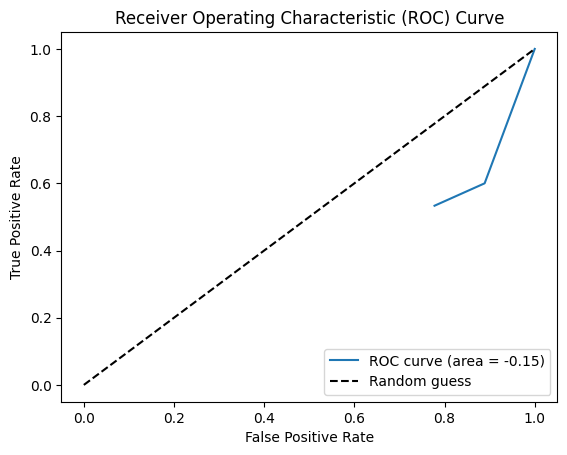

In [22]:
# TODO: Test the plotting function on the TPR and FPR you just calculated.
plot_ROC(TPR, FPR)

## Cross-validation

The final task is to take everything you have implemented so far and apply it in a cross-validation loop.

**Note 1:** To better reflect a real scenarios, you should shuffle the data before doing cross-validation.

**Note 2:** When using cross-validation, the interesting thing is the mean performance (mean AUC, mean accuracy, mean ROC-curve).

**Note 3:** This part is a bit more free in terms of implementation, but make sure to use some of the previously implemented functions.

### 10) Cross-validation loop

In [23]:
def cross_validation(data, target, folds = 10, threshold_stepsize = 0.1):

    # TODO: Implement Cross-validation
    
    for i in range(folds):


        ...

    # TODO: Plot the average ROC-curve.
    # NOTE: Take the correct average!

    plot_ROC(...)

### 11) 10-fold Cross-validation on all classes

Test the "cross_validation" function on all the classes against eachother using 10 folds.

* Iris-setosa vs Iris-versicolor
* Iris-setosa vs Iris-virginica
* Iris-versicolor vs Iris-virginica

In [24]:
# TODO: Implement and test cross-validation function on all classes.

In [25]:
# TODO: Implement and test cross-validation function on all classes.

In [26]:
# TODO: Implement and test cross-validation function on all classes.

# Questions for examination:

In addition to completing the assignment with all its tasks, you should also prepare to answer the following questions:

1) Why is it called "naive bayes"?

2) What are some downsides of the naive bayes learning algorithm?

3) When using ROC-curves, what is the theoretical best and worst result you can get?

4) When using ROC-curves, in this assignment for example, is a higher threshold-stepsize always better?  

5) When using cross-validation and ROC-curves, why is it important to take the correct mean values? What could go wrong?


# Finished!

Was part of the setup incorrect? Did you spot any inconsistencies in the assignment? Could something improve?

If so, please write them and send via email and send it to:

* marcus.gullstrand@ju.se

Thank you!